# Diabetes Prediction

## About the dataset

<p>This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes</p>
<p>1) Pregnancies              : Number of times pregnant</p>
<p>2) Glucose                  : Plasma glucose concentration a 2 hour in an oral glucose tolerance test</p>
<p>3) Blood Pressure           : Diastolic Blood pressure (mm Hg)</p>
<p>4) SkinThickness            : Triceps skin fold thickness(mm)</p>
<p>5) Insulin                  : 2-hour serum insulin (mu U/ml)</p>
<p>6) DiabetesPedigreeFunction : Diabetes Pedigree Function</p>
<p>7) Age                      : Age</p>
<p>8) Outcome                  : 1 - Diabetes, 0 - No diabetes

In [1]:
# import needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# Read the dataset with pandas
dia_df = pd.read_csv('diabetes.csv')
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Get the quick info about dataset
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Disripition of data set
dia_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Preprocessing

In [5]:
# Seeking the null values
dia_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
dia_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
# detecting the number of rows that contains 0 in Insulin cloumn
(dia_df[dia_df.Insulin==0])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
# Imputing the value with mean value
dia_df.Insulin.replace(to_replace=0,value=dia_df.Insulin.mean(),inplace=True)

In [9]:
# detecting the number of rows that contains 0 in Skin Thickness cloumn
dia_df[dia_df['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,79.799479,23.3,0.672,32,1
5,5,116,74,0,79.799479,25.6,0.201,30,0
7,10,115,0,0,79.799479,35.3,0.134,29,0
9,8,125,96,0,79.799479,0.0,0.232,54,1
10,4,110,92,0,79.799479,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,79.799479,36.3,0.258,52,1
758,1,106,76,0,79.799479,37.5,0.197,26,0
759,6,190,92,0,79.799479,35.5,0.278,66,1
762,9,89,62,0,79.799479,22.5,0.142,33,0


In [10]:
# Imputing the value with mean value
dia_df.SkinThickness.replace(to_replace=0,value=dia_df.SkinThickness.mean(),inplace=True)

In [11]:
# detecting the number of rows that contains 0 in  cloumn
dia_df[dia_df['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,20.536458,79.799479,0.0,0.232,54,1
49,7,105,0,20.536458,79.799479,0.0,0.305,24,0
60,2,84,0,20.536458,79.799479,0.0,0.304,21,0
81,2,74,0,20.536458,79.799479,0.0,0.102,22,0
145,0,102,75,23.000000,79.799479,0.0,0.572,21,0
371,0,118,64,23.000000,89.000000,0.0,1.731,21,0
426,0,94,0,20.536458,79.799479,0.0,0.256,25,0
494,3,80,0,20.536458,79.799479,0.0,0.174,22,0
522,6,114,0,20.536458,79.799479,0.0,0.189,26,0
684,5,136,82,20.536458,79.799479,0.0,0.640,69,0


In [12]:
# Imputing the value with mean value
dia_df['BMI'].replace(to_replace=0,value=dia_df['BMI'].mean(),inplace=True)

### Detecting and removing the outliers

In [13]:
# removing outliers in Blood pressure column using IQR
q1 = dia_df.BloodPressure.quantile(0.25)
q3 = dia_df.BloodPressure.quantile(0.75)

In [14]:
IQR = q3-q1
upper = q3+1.5*IQR
lower = q1-1.5*IQR

In [15]:
upper,lower

(107.0, 35.0)

In [16]:
dia_df = dia_df[(dia_df.BloodPressure>lower)&(dia_df.BloodPressure<upper)]

In [17]:
dia_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [18]:
# removing outliers in glucose cloumn using IQR
q1=dia_df.Glucose.quantile(0.25)
q3=dia_df.Glucose.quantile(0.75)

In [19]:
IQR = q3-q1
upper,lower = q3+1.5*IQR, q1-1.5*IQR
upper,lower

(204.0, 36.0)

In [20]:
dia_df = dia_df[(dia_df.Glucose>lower)&(dia_df.Glucose<upper)]

In [21]:
dia_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


## Exploratory Data Analysis

### Distribution of  variables

In [22]:
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


<Axes: xlabel='BloodPressure', ylabel='Count'>

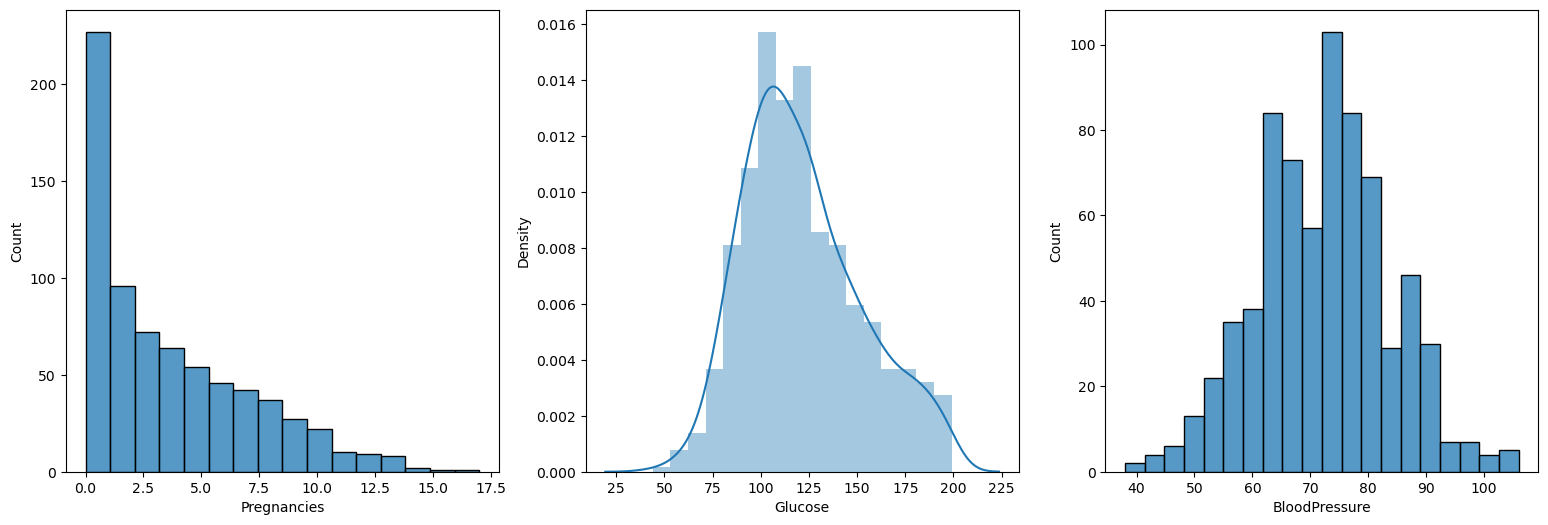

In [23]:
fig, ax = plt.subplots(1,3,figsize=(19,6))
sns.histplot(dia_df.Pregnancies,ax=ax[0])
sns.distplot(dia_df.Glucose,ax=ax[1])
sns.histplot(dia_df.BloodPressure,ax=ax[2])

<p> Chart 1 illustrates number of pregnancies. Many of the females don't get pregnant or atleast one </p> 
<p> Chart 2 Demonstrates glucose level of the patients. Most of the patients have glucose level range between 80 to 130 </p>
<p> Chart 3 describes the boold pressure of the patients. Most of the patients have blood pressure range between 65 to 80 mmHg</p>

<Axes: xlabel='BMI', ylabel='Density'>

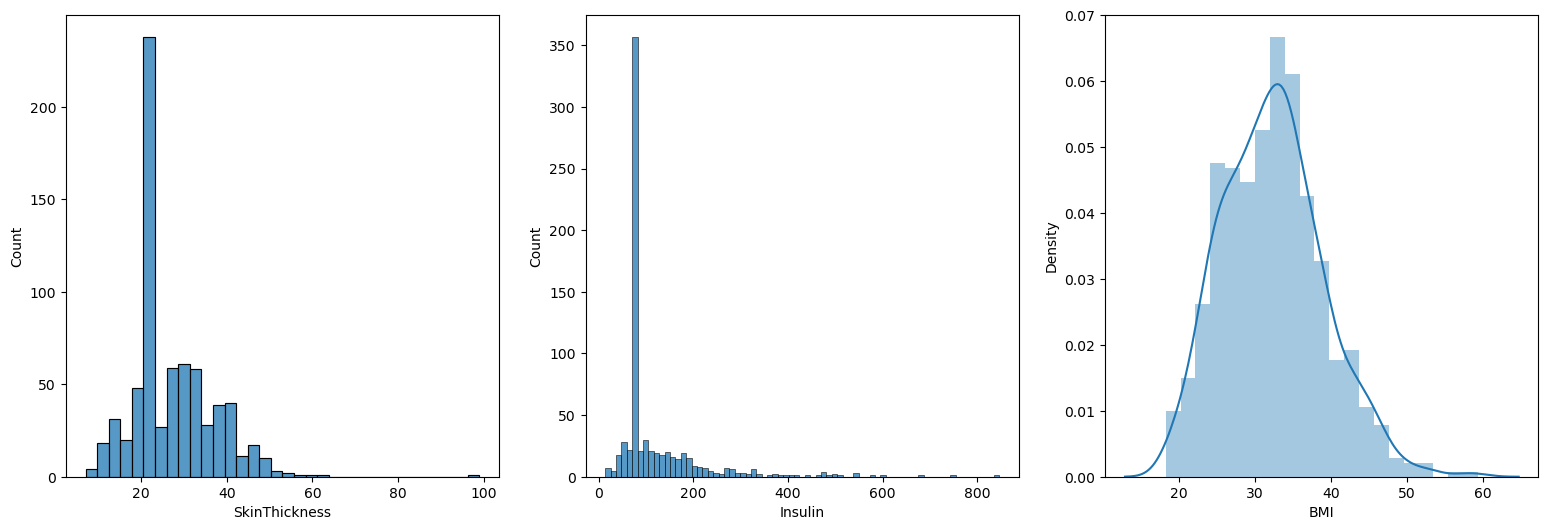

In [24]:
fig, ax = plt.subplots(1,3,figsize=(19,6))
sns.histplot(dia_df.SkinThickness,ax=ax[0])
sns.histplot(dia_df.Insulin,ax=ax[1])
sns.distplot(dia_df.BMI,ax=ax[2])

These charts demonstrates the distribution of skin thickness, insulin, BMI of the patients respectively. Most of the patients have the skin thickness 20, insulin range between 0 to 200 and BMI range between 25 to 37.  

<Axes: xlabel='Age', ylabel='Count'>

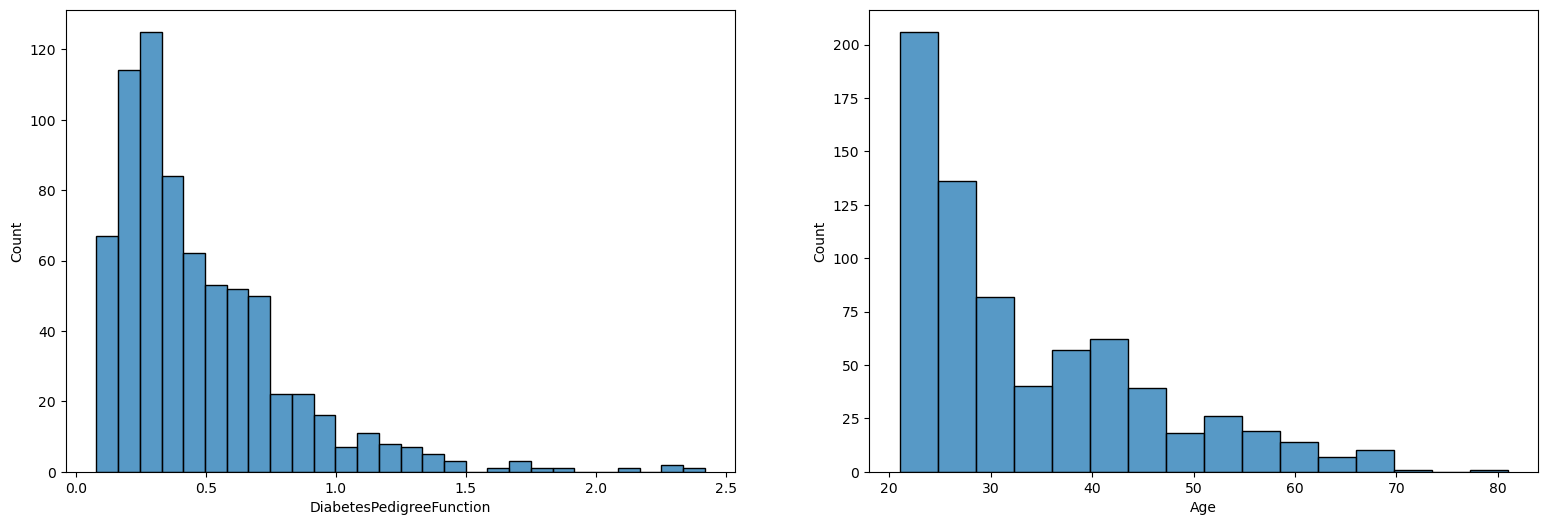

In [25]:
fig, ax = plt.subplots(1,2,figsize=(19,6))
sns.histplot(dia_df.DiabetesPedigreeFunction,ax=ax[0])
sns.histplot(dia_df.Age,ax=ax[1])

These charts demonstrates the distribution of Diabetes pedigree function, Age, result of having diabetes of the patients respectively. Most of the patients have the Diabetes pedigree function range between 0 to 0.5, age range between 21 to 30. 

([<matplotlib.patches.Wedge at 0x2822f75c610>,
 [Text(-0.5262135668456065, 0.9659706424460448, 'No Diabetes'),
  Text(0.5262135668456059, -0.9659706424460451, 'Diabetes')])

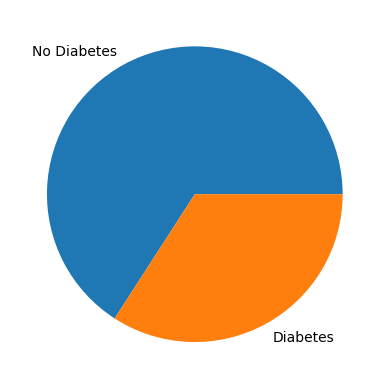

In [26]:
plt.pie(x=dia_df['Outcome'].value_counts(),labels=['No Diabetes','Diabetes'])

Most of the females don't have diabetes. 

### Relationship with target variable

[Text(0.5, 1.0, 'Age vs BMI')]

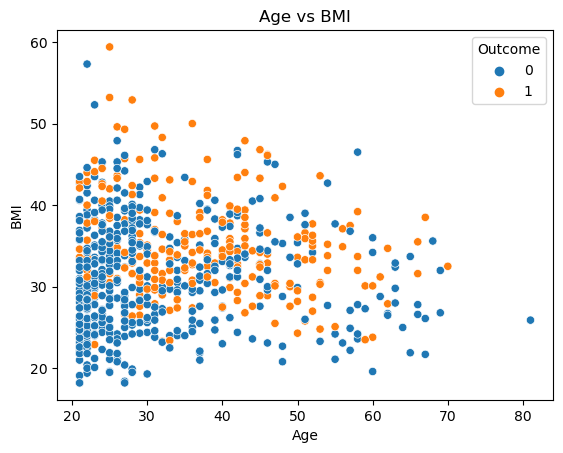

In [27]:
sns.scatterplot(x='Age',y='BMI',data=dia_df,hue='Outcome').set(title='Age vs BMI')

In this plot we can know lower the BMI lower the risk of diabetes.

[Text(0.5, 1.0, 'Glucose vs BMI')]

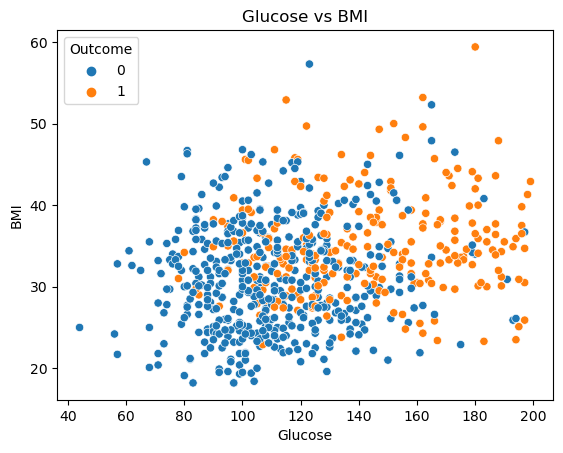

In [28]:
sns.scatterplot(x='Glucose',y='BMI',data=dia_df,hue='Outcome').set(title='Glucose vs BMI')

This Chart clearly shows glucose level strongly affects the outcome of diabetes 

### Heatmap

[Text(0.5, 1.0, 'Relationship between variables')]

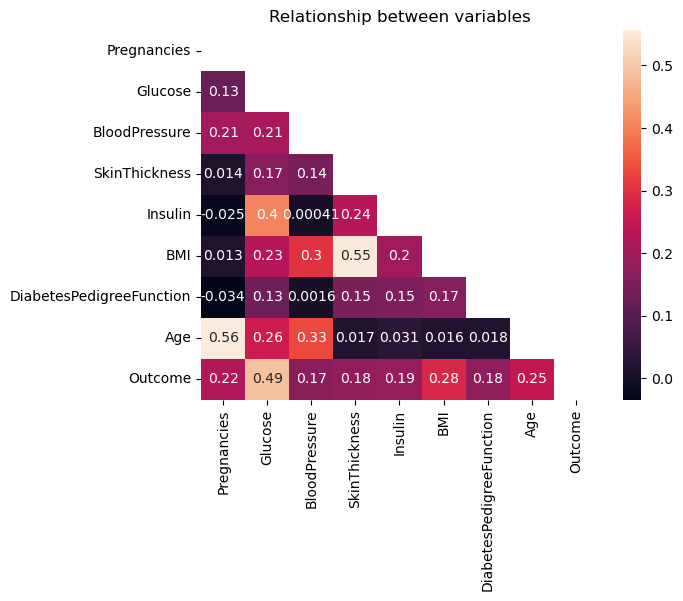

In [29]:
sns.heatmap(dia_df.corr(),annot = True,
           mask = np.triu(np.ones_like(dia_df.corr()))).set(title='Relationship between variables')

## Model Building

In [30]:
# Seprate the target variable 
x = dia_df.drop('Outcome',axis=1)
y = dia_df.Outcome

In [31]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(574, 8)

Models to be used 
1) Decision Tree Classifier
2) Random Forest Classifier

### Decision Tree Classifier

In [32]:
DTC = DecisionTreeClassifier()

In [33]:
# parameters needed for hyperparameter tuning
params = {
    'min_samples_leaf':[2,4,6,8,10],
    'min_samples_split':[2,4,6,8,10],
    'max_depth':[2,5,10,20],
    'criterion':['gini','entropy'],
    'random_state':[0,42]
}

In [34]:
# Grid Search CV
clf = GridSearchCV(DTC,params,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 0}

In [35]:
# Training score
clf.best_estimator_.score(x_train,y_train)

0.8101045296167247

In [36]:
# Test score
clf.best_estimator_.score(x_test,y_test)

0.75

In [37]:
# Predicted values
d_pred = clf.best_estimator_.predict(x_test)

### Random Forest Classifier

In [38]:
RFC = RandomForestClassifier()

In [39]:
# parameters needed for hyperparameter tuning
params = {
    'min_samples_leaf':[2,6,10],
    'min_samples_split':[10,20],
    'max_depth':[10,20],
    'criterion':['gini','entropy'],
    'random_state':[0,42]
}

In [40]:
# Grid Search CV
clf = GridSearchCV(RFC,params,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 6,
 'min_samples_split': 20,
 'random_state': 42}

In [41]:
# Training score
clf.best_estimator_.score(x_train,y_train)

0.8588850174216028

In [42]:
# Test score 
clf.best_estimator_.score(x_test,y_test)

0.7847222222222222

In [43]:
# Predicted values
r_pred = clf.best_estimator_.predict(x_test)

## Model Evaluation

### Confusion Matrix heatmap

[Text(0.5, 1.0, 'Random Forest Confusion Matrix'),
 Text(0.5, 25.722222222222214, 'Actual'),
 Text(737.5404040404039, 0.5, 'Predicted')]

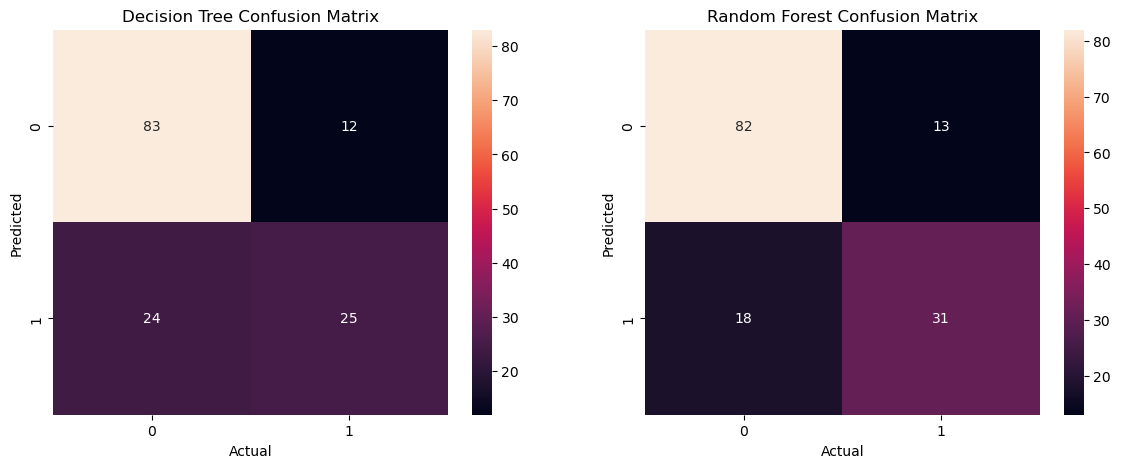

In [52]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
sns.heatmap(confusion_matrix(y_test,d_pred),annot=True,ax=ax[0]).set(title='Decision Tree Confusion Matrix',xlabel='Actual',ylabel='Predicted')
sns.heatmap(confusion_matrix(y_test,r_pred),annot=True,ax=ax[1]).set(title='Random Forest Confusion Matrix',xlabel='Actual',ylabel='Predicted')

### Classification report

In [56]:
# Decision Tree
d = classification_report(y_test,d_pred,output_dict=True)
pd.DataFrame(d).transpose()

,precision,recall,f1-score,support
0,0.775701,0.873684,0.821782,95.00
1,0.675676,0.510204,0.581395,49.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.725688,0.691944,0.701589,144.00
weighted avg,0.741665,0.750000,0.739984,144.00


In [57]:
# Random Forest 
r = classification_report(y_test,r_pred,output_dict=True)
pd.DataFrame(r).transpose()

,precision,recall,f1-score,support
0,0.820000,0.863158,0.841026,95.000000
1,0.704545,0.632653,0.666667,49.000000
accuracy,0.784722,0.784722,0.784722,0.784722
macro avg,0.762273,0.747905,0.753846,144.000000
weighted avg,0.780713,0.784722,0.781695,144.000000
